Linear Regression and Learning Curve challenges

Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error,
test error,
R squared,
AIC.

Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [21]:
import pandas as pd
import numpy as np
import scipy
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import sklearn.metrics
from patsy import dmatrices

%matplotlib inline

#import statsmodels.formula.api as smf

## Challenge 1

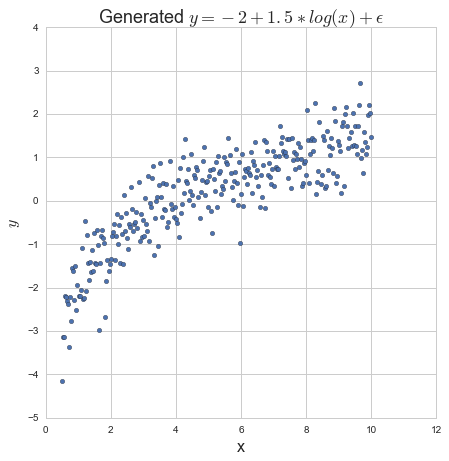

In [22]:
x = np.linspace(0.5, 10, 300)
y = -2*np.ones(300) + 1.5*np.log(x) + np.random.normal(0, 0.5, 300)
df = pd.DataFrame({'x': list(x), 'y': list(y)})

plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

pplot = plt.scatter(x, y)
plt.xlabel('x', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)
plt.title("Generated $y = -2 + 1.5*log(x) + \epsilon$", fontsize=18);

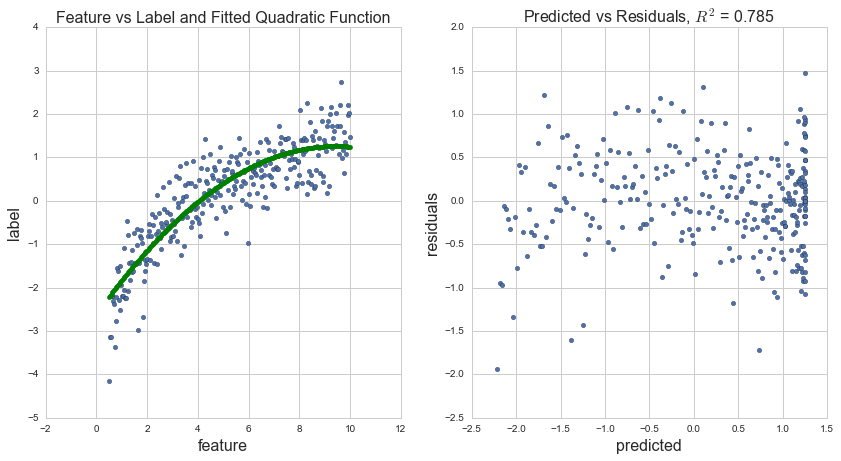

In [23]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
X = x[:, np.newaxis]

model.fit(X,y)
y_hat = model.predict(X)
residuals = y - y_hat

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(x, y)
plt.scatter(x, y_hat, color = 'green')
plt.xlabel('feature', fontsize = 16)
plt.ylabel('label', fontsize = 16)
plt.title("Feature vs Label and Fitted Quadratic Function", fontsize=16)

plt.subplot(1,2,2)
plt.scatter(y_hat, residuals)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=16);


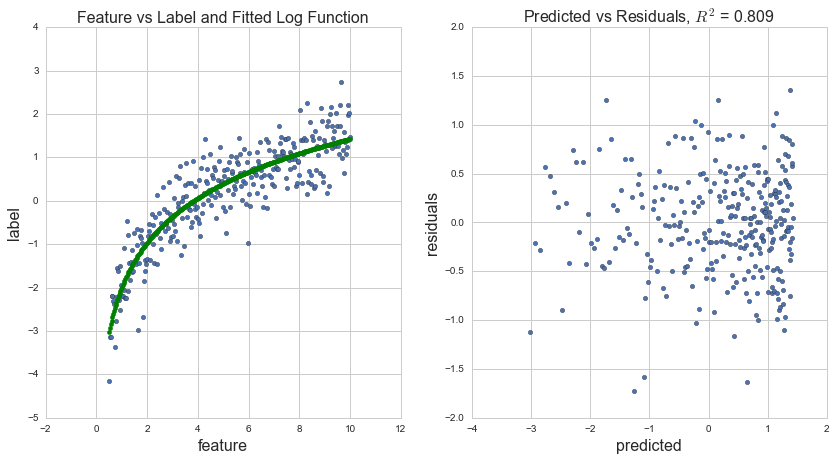

In [24]:
df['logx'] = np.log(df.x)
y, X = dmatrices('y ~ logx', data=df, return_type='dataframe')
model = LinearRegression()
model.fit(X,y)
y_hat = model.predict(X)
residuals = y - y_hat

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(x, y)
plt.scatter(x, y_hat, color = 'green')
plt.xlabel('feature', fontsize = 16)
plt.ylabel('label', fontsize = 16)
plt.title("Feature vs Label and Fitted Log Function", fontsize=16)

plt.subplot(1,2,2)
plt.scatter(y_hat, residuals)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=16);


Fitting linear log(x) model has a slightly better fit than fitting quadratic polynomial.

## Challenge 2

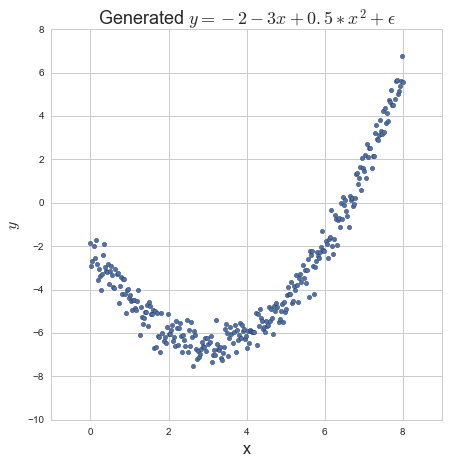

In [25]:
x = np.linspace(0, 8, 300)
y = -2*np.ones(300) - 3*x + 0.5*x**2 + np.random.normal(0, 0.5, 300)
df = pd.DataFrame({'x': list(x), 'y': list(y)})

plt.figure(figsize = (7,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

pplot = plt.scatter(x, y)
plt.xlabel('x', fontsize = 16)
plt.ylabel('$y$', fontsize = 16)
plt.title("Generated $y = -2 - 3x + 0.5*x^2 + \epsilon$", fontsize=18);

MSE on the test set is 0.268
MSE on the train set is 0.238


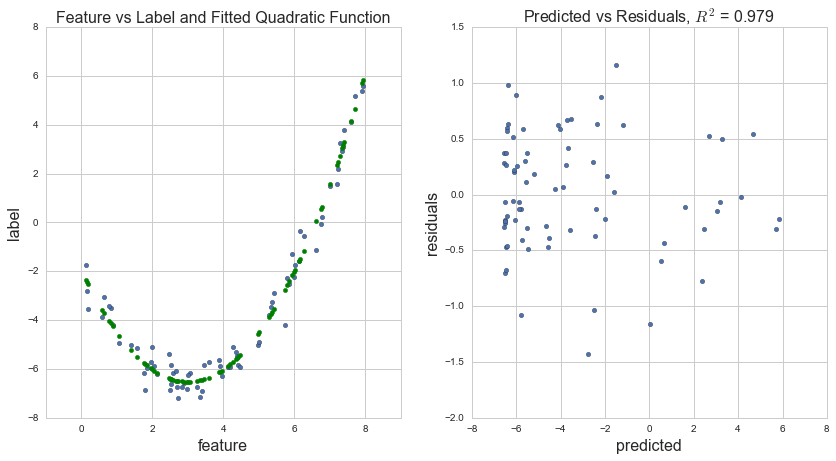

In [26]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
X = x[:, np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

model.fit(x_train,y_train)
y_hat_test = model.predict(x_test)
residuals_test = y_test - y_hat_test

y_hat_train = model.predict(x_train)
residuals_train = y_train - y_hat_train

print('MSE on the test set is ' + "{0:.3f}".format(sklearn.metrics.mean_squared_error(y_hat_test, y_test)))
print('MSE on the train set is ' + "{0:.3f}".format(sklearn.metrics.mean_squared_error(y_hat_train, y_train)))

plt.figure(figsize=(14, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_hat_test, color = 'green')
plt.xlabel('feature', fontsize = 16)
plt.ylabel('label', fontsize = 16)
plt.title("Feature vs Label and Fitted Quadratic Function", fontsize=16)

plt.subplot(1,2,2)
plt.scatter(y_hat_test, residuals_test)
plt.xlabel('predicted', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.title("Predicted vs Residuals, $R^2$ = " + "{0:.3f}".format(model.score(X, y)), fontsize=16);


## Challenge 3

In [27]:
MSE_Training = []
MSE_Testing = []
R2_Testing = []
AIC = []

for d in range(8):
    
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    X = x[:, np.newaxis]
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1234)
    model.fit(x_train,y_train)
    y_hat_test = model.predict(x_test)
    y_hat_train = model.predict(x_train)
    MSE_Testing.append(sklearn.metrics.mean_squared_error(y_test, y_hat_test))
    MSE_Training.append(sklearn.metrics.mean_squared_error(y_train, y_hat_train))
    R2_Testing.append(sklearn.metrics.r2_score(y_test, y_hat_test))
    
    #AIC = 2k + n ln(RSS) 
    RSS = np.square(y_hat_test - y_test).sum()
    k = len(model.steps[1][1].coef_)
    AIC.append(2*k + len(y_test)*math.log(RSS))



 Plot all the scores.

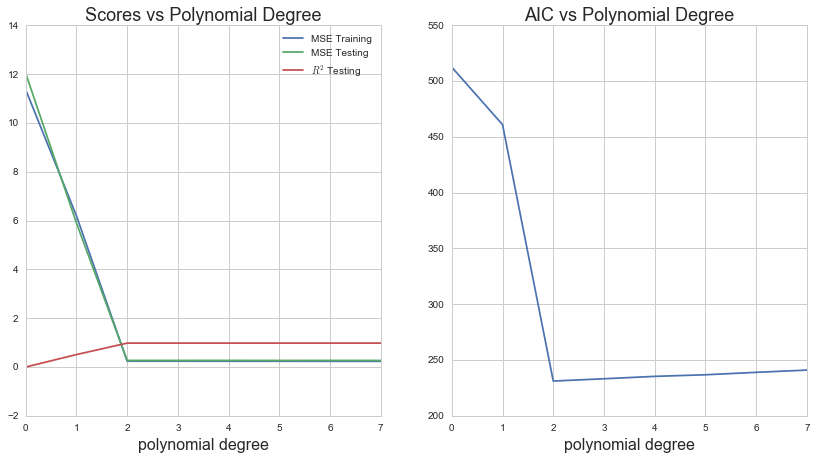

In [28]:
plt.figure(figsize = (14,7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

plt.subplot(1,2,1)
p1, = plt.plot(range(8), MSE_Training)
p2, = plt.plot(range(8), MSE_Testing)
p3, = plt.plot(range(8), R2_Testing)

plt.xlabel('polynomial degree', fontsize = 16)
plt.legend([p1,p2,p3], ['MSE Training', 'MSE Testing', '$R^2$ Testing'])
plt.title("Scores vs Polynomial Degree", fontsize=18)


plt.subplot(1,2,2)
p4 = plt.plot(range(8), AIC)
plt.xlabel('polynomial degree', fontsize = 16)
plt.title("AIC vs Polynomial Degree", fontsize=18);


## Challenge 4

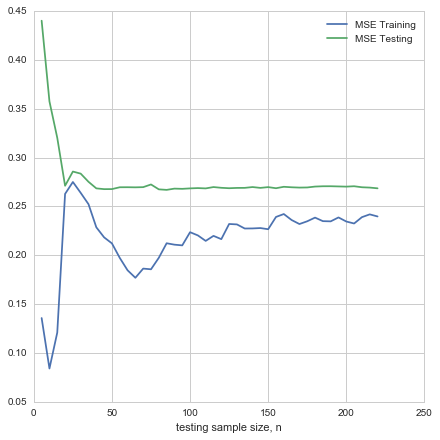

In [29]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
X = x[:, np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

MSE_Testing=[]
MSE_Training = []
learning_curve = range(5, len(y_train),5)

for i in learning_curve:
    
    model.fit(x_train[:i],y_train[:i])
    y_hat_test = model.predict(x_test)
    y_hat_train = model.predict(x_train[:i])

    MSE_Training.append(sklearn.metrics.mean_squared_error(y_hat_train, y_train[:i]))
    MSE_Testing.append(sklearn.metrics.mean_squared_error(y_hat_test, y_test))
    
plt.figure(figsize=(7, 7))
sns.set(context="notebook", style = 'whitegrid', color_codes=True)

p1, = plt.plot(learning_curve, MSE_Training)
p2, = plt.plot(learning_curve, MSE_Testing)
plt.legend([p1,p2],['MSE Training','MSE Testing'])
plt.xlabel('testing sample size, n');
